In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
icecream_df = pd.read_csv('../data/raw/icecream_sales.csv')

icecream_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [19]:
icecream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [20]:
icecream_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


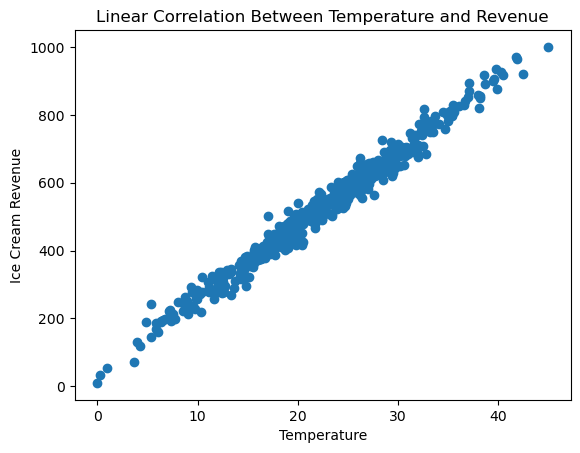

In [21]:
plt.title("Linear Correlation Between Temperature and Revenue")
plt.scatter(icecream_df['Temperature'], icecream_df['Revenue'])
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Revenue")
plt.show()

In [22]:
X = icecream_df['Temperature']
y = icecream_df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [23]:
perceptron_regressor = tf.keras.models.Sequential()
perceptron_regressor.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
perceptron_regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                           patience=10)

perceptron_regressor.compile(optimizer=tf.optimizers.Adam(0.1), loss='mse')
epochs_info = perceptron_regressor.fit(X_train, y_train, epochs=1000,
                                       callbacks=[early_stopping_callback])

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 329193.6875
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 293805.1875
Epoch 3/1000
13/13 [==============================] - 0s 923us/step - loss: 261215.3594
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 231685.1406
Epoch 5/1000
13/13 [==============================] - 0s 1000us/step - loss: 204090.0469
Epoch 6/1000
13/13 [==============================] - 0s 923us/step - loss: 179320.6562
Epoch 7/1000
13/13 [==============================] - 0s 923us/step - loss: 156947.0625
Epoch 8/1000
13/13 [==============================] - 0s 846us/step - loss: 136711.1875
Epoch 9/1000
13/13 [==============================] - 0s 692us/step - loss: 118640.7500
Epoch 10/1000
13/13 [==============================] - 0s 692us/step - loss: 102594.9531
Epoch 11/1000
13/13 [==============================] - 0s 769us/step - loss: 88271.0781
Epoch 12/1000
13/13 [===============

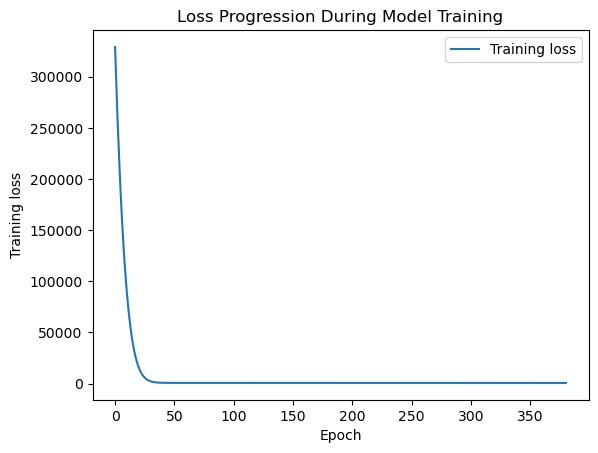

In [25]:
plt.plot(epochs_info.history['loss'])
plt.title("Loss Progression During Model Training")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(["Training loss"])
plt.show()

Perceptron regressor weight:  [[21.746174]]
Perceptron regressor bias:  [38.08079]


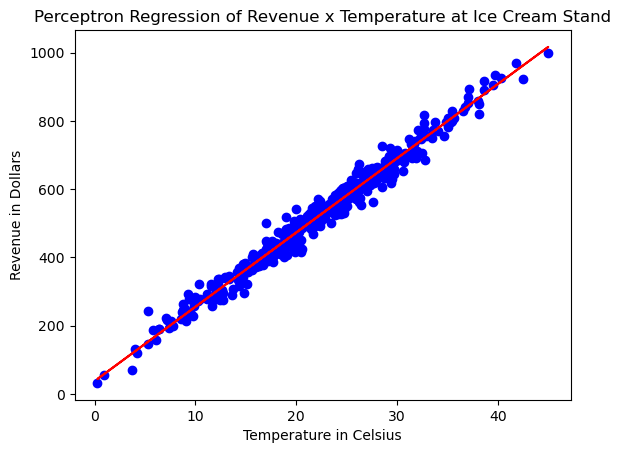

In [30]:
print("Perceptron regressor weight: ", perceptron_regressor.get_weights()[0])
print("Perceptron regressor bias: ", perceptron_regressor.get_weights()[1])

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, perceptron_regressor.predict(X_train), color='r')
plt.title("Perceptron Regression of Revenue x Temperature at Ice Cream Stand")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Revenue in Dollars")
plt.show()

Linear regression coefficient:  [[21.5133908]]
Linear regression intercept:  [43.73357869]


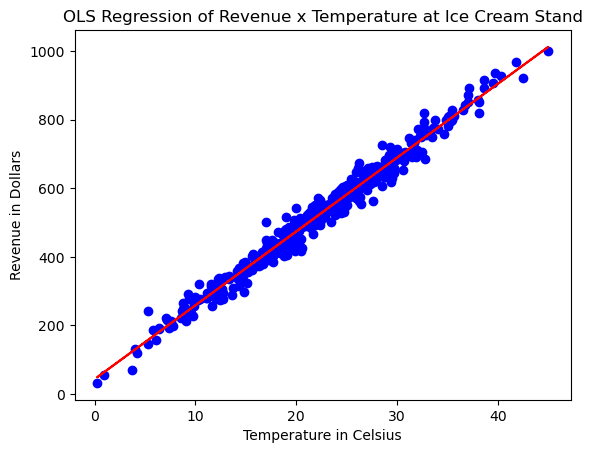

In [27]:
X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reshaped, y_train_reshaped)

print("Linear regression coefficient: ", linear_regressor.coef_)
print("Linear regression intercept: ", linear_regressor.intercept_)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train_reshaped, linear_regressor.predict(X_train_reshaped),
         color='r')
plt.title("OLS Regression of Revenue x Temperature at Ice Cream Stand")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Revenue in Dollars")
plt.show()

In [28]:
temperature_test = 26

print("Perceptron regressor predicted revenue: ",
      np.round(perceptron_regressor.predict([temperature_test]), 2))
print("Ordinary least squares regressor predicted revenue: ",
      np.round(linear_regressor.predict([[temperature_test]])))
print("Actual revenue: ", icecream_df.iloc[1, 1])

Perceptron regressor predicted revenue:  [[603.48]]
Ordinary least squares regressor predicted revenue:  [[603.]]
Actual revenue:  625.1901215
